<a href="https://colab.research.google.com/github/basmala-kamal/tut-pricing-model/blob/main/kmeans-body-splash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup


In [ ]:
import json
import pandas as pd
import re

# 1. Load the JSON file
with open("body+splash.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to a pandas DataFrame for easier data manipulation
df = pd.DataFrame(data)
df = df.dropna(subset=["price", "rating"])
import time


# Define the function to scrape the brand name
def scrape_brand_name(session, url):
    try:
        if not url or not url.startswith("http"):  # Validate URL
            return None

        # Send a GET request to the URL using the session
        response = session.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for HTTP issues

        # Parse the page content with BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Adjust this selector based on the actual structure of the webpage
        brand_tag = soup.find("tr", class_="a-spacing-small po-brand")
        if brand_tag:
            td_tag = brand_tag.find("td", class_="a-span9")
            if td_tag:
                span_tag = td_tag.find("span", class_="a-size-base po-break-word")
                if span_tag:
                    return span_tag.get_text(strip=True)

        # Return None if the brand name is not found
        return None

    except requests.exceptions.RequestException as e:
        print(f"Network error scraping {url}: {e}")
        return None
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None

# Load the JSON file

"""
# Ensure the 'link' column exists and is valid
if "link" in df.columns:
    # Create a requests session
    with requests.Session() as session:
        # Set a User-Agent header to mimic a browser (optional but recommended)
        session.headers.update({
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
        })

        # Apply the scraping function to the 'link' column
        brand_names = []
        for idx, url in enumerate(df["link"]):
            print(f"Scraping {idx + 1}/{len(df)}: {url}")
            brand_name = scrape_brand_name(session, url)
            brand_names.append(brand_name)

            # Throttle requests to avoid getting blocked
            time.sleep(2)

        # Add the scraped brand names to the DataFrame
        df["brand_name"] = brand_names"""


def clean_price(price_str):
    if price_str is None:
        return None
    numeric_str = re.sub(r"[^\d\.]", "", price_str)
    try:
        return float(numeric_str)
    except ValueError:
        return None

df["price_numeric"] = df["price"].apply(clean_price)


def clean_rating(rating_str):
    if rating_str is None:
        return None


    match = re.search(r"\d+(\.\d+)?", rating_str)
    if match:
        try:
            return float(match.group(0))
        except ValueError:
            return None
    return None


df["rating_numeric"] = df["rating"].apply(clean_rating)


def extract_volume(title_str):
    # Check for "أوز" (prioritize this if found)
    match_oz = re.search(r'(\d+(?:\.\d+)?)\s*(?:مل\.\s*أوز|أوز)', title_str)
    if match_oz:
        return float(match_oz.group(1)) * 29.5735  # Convert oz to ml

    # Check for "مل" (only if "أوز" is not found)
    match_ml = re.search(r'(\d+(?:\.\d+)?)\s*مل', title_str)
    if match_ml:
        return float(match_ml.group(1))

    # If no match, return None
    return None

# Apply the function to the DataFrame
df["volume"] = df["title"].apply(extract_volume)

# ------------------------------------------------------------------------------
# Final cleaned DataFrame
df = df[~df["title"].str.contains("عرق|التعرق|تعرق|العرق", na=False)]
print(df)


                                                 title         price  \
0    جي .كازانوفا بلو بخاخ معطر للجسم برئحة فانيلا ...   ‏21.00 ريال   
1     سبلاش للجسم للرجال من بيور بيوتي 250 مل ماجيستيك   ‏23.20 ريال   
3          بودي سبلاش كاسانوفا، للجنسين، 235.0 ملليلتر   ‏22.50 ريال   
5    سبراي معطر للجسم من بودي فانتاسيز سيجنتشر - زه...   ‏42.95 ريال   
6    جي .كازانوفا بلو بخاخ معطر للجسم برئحة تيزمي ,...   ‏21.00 ريال   
..                                                 ...           ...   
297  ليرير سبلاش للجسم ميستيك ايلاند من ووتاجيرل، 1...   ‏69.13 ريال   
299  عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين   ‏69.81 ريال   
303  ليرير سبلاش للجسم ماندرين تويست من ووتاجيرل، 1...  ‏189.25 ريال   
304  ارماف بخاخ الجسم انشانتد رومانس للنساء 200 مل ...   ‏99.00 ريال   
305  بخاخ للجسم برائحة جوز الهند للنساء معطر يدوم ط...   ‏75.88 ريال   

            rating                                               link  \
0    4.2 من 5 نجوم  https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%

In [ ]:
df

,title,price,rating,link,price_numeric,rating_numeric,volume
0,جي .كازانوفا بلو بخاخ معطر للجسم برئحة فانيلا ...,‏21.00 ريال,4.2 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,21.00,4.2,235.0
1,سبلاش للجسم للرجال من بيور بيوتي 250 مل ماجيستيك,‏23.20 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,23.20,4.1,250.0
3,بودي سبلاش كاسانوفا، للجنسين، 235.0 ملليلتر,‏22.50 ريال,5.0 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,22.50,5.0,235.0
5,سبراي معطر للجسم من بودي فانتاسيز سيجنتشر - زه...,‏42.95 ريال,4.3 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,42.95,4.3,236.0
6,"جي .كازانوفا بلو بخاخ معطر للجسم برئحة تيزمي ,...",‏21.00 ريال,4.7 من 5 نجوم,https://www.amazon.sa/%D8%AC%D9%8A-%D9%83%D8%A...,21.00,4.7,235.0
...,...,...,...,...,...,...,...
297,ليرير سبلاش للجسم ميستيك ايلاند من ووتاجيرل، 1...,‏69.13 ريال,3.9 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,69.13,3.9,135.0
299,عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين,‏69.81 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,69.81,4.1,9.0
303,ليرير سبلاش للجسم ماندرين تويست من ووتاجيرل، 1...,‏189.25 ريال,4.0 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,189.25,4.0,135.0
304,ارماف بخاخ الجسم انشانتد رومانس للنساء 200 مل ...,‏99.00 ريال,3.9 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,99.00,3.9,200.0


In [ ]:
zero_or_negative = df[df["volume"] <= 50]
zero_or_negative

,title,price,rating,link,price_numeric,rating_numeric,volume
76,مجموعة كومبو سبلاش للجسم من لاير، 25 مل (عبوة ...,‏57.18 ريال,4.0 من 5 نجوم,https://www.amazon.sa/%D8%A8%D8%AE%D8%A7%D8%AE...,57.18,4.0,25.0
271,بانيير دي سين روز أو دي تواليت - صنع في فرنسا ...,‏283.00 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,283.00,4.1,50.0
277,دولتشي اند غابانا ذا ون للنساء 30 مل - او دى ب...,‏245.00 ريال,4.5 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,245.00,4.5,30.0
285,عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين,‏69.81 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,69.81,4.1,9.0
292,دولتشي اند غابانا ذا ون للنساء 30 مل - او دى ب...,‏245.00 ريال,4.5 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,245.00,4.5,30.0
299,عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين,‏69.81 ريال,4.1 من 5 نجوم,https://www.amazon.sa/%D9%84%D9%84%D8%AC%D8%B3...,69.81,4.1,9.0


In [ ]:
df_cleaned = (
    df[["title", "price_numeric", "rating_numeric", "volume"]]
    .dropna(subset=["title", "price_numeric", "rating_numeric","volume"])
)

df_cleaned.shape


(185, 4)

<Axes: xlabel='volume', ylabel='price_numeric'>

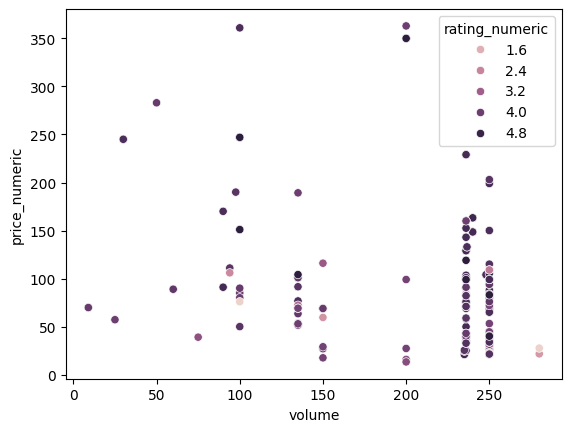

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = df_cleaned, x = 'volume', y = 'price_numeric', hue = 'rating_numeric')

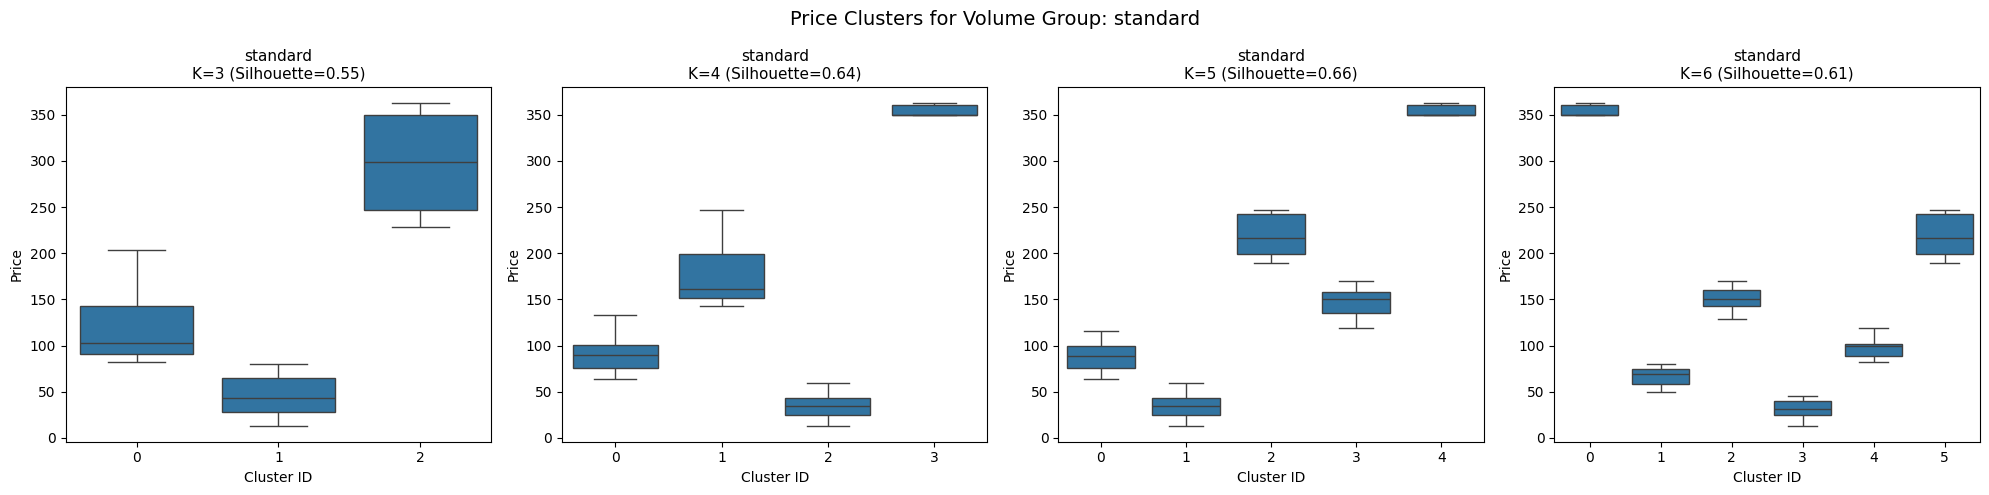

No data for group 'nan'. Skipping.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


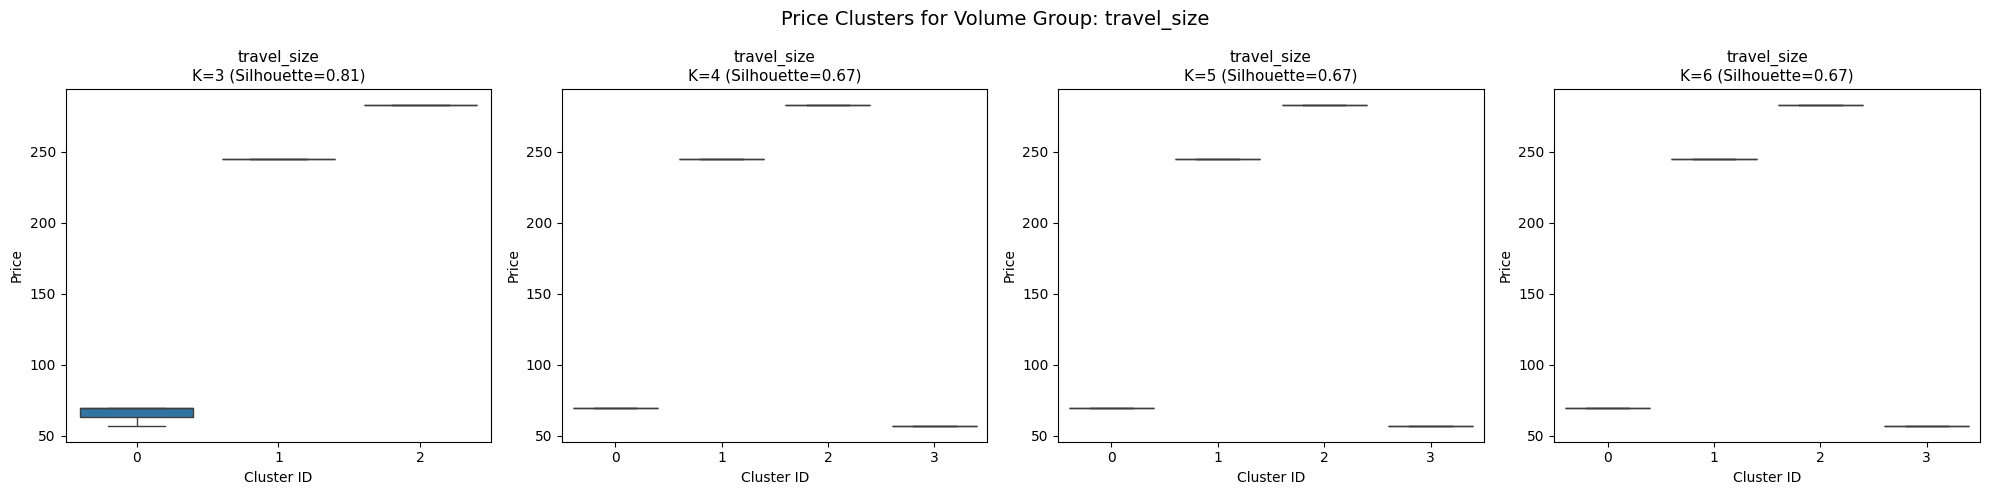

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no NaNs in required columns
df_cleaned = df_cleaned.dropna(subset=["volume", "price_numeric"])

# 1) Create volume groups
df_cleaned["volume_group"] = pd.cut(
    df_cleaned["volume"],
    bins=[0, 50, 250],
    labels=["travel_size", "standard"],
    include_lowest=True  # Include 0 in the first group
)

for group_name in df_cleaned["volume_group"].unique():
    subset = df_cleaned[df_cleaned["volume_group"] == group_name].copy()

    if subset.empty:
        print(f"No data for group '{group_name}'. Skipping.")
        continue

    # 2) Scale ONLY price_numeric
    if len(subset) <= 1:
        print(f"Only one row in group '{group_name}'. Skipping clustering.")
        continue

    X_price = subset[["price_numeric"]].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_price)

    # Make a figure with 4 subplots
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

    for idx, k in enumerate([3, 4, 5, 6]):
        if len(subset) < k:
            print(f"Skipping k={k} for group '{group_name}' due to insufficient data.")
            continue

        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(X_scaled)

        # Store cluster labels
        cluster_col = f"cluster_k{k}"
        subset[cluster_col] = kmeans.labels_

        # Silhouette score (handle cases with < 2 clusters)
        if len(subset[cluster_col].unique()) > 1:
            sil_score = silhouette_score(X_scaled, kmeans.labels_)
        else:
            sil_score = np.nan

        # 3) Visualize via boxplot
        sns.boxplot(
            x=cluster_col,
            y="price_numeric",
            data=subset,
            ax=axes[idx]
        )
        axes[idx].set_title(
            f"{group_name}\nK={k} (Silhouette={sil_score:.2f})",
            fontsize=11
        )
        axes[idx].set_xlabel("Cluster ID")
        axes[idx].set_ylabel("Price")

    # Save cluster labels back to df_cleaned
    for cluster_col in [f"cluster_k{k}" for k in [3, 4, 5, 6]]:
        df_cleaned.loc[subset.index, cluster_col] = subset[cluster_col]

    plt.suptitle(f"Price Clusters for Volume Group: {group_name}", fontsize=14)
    plt.subplots_adjust(top=0.85)
    plt.tight_layout()
    plt.show()


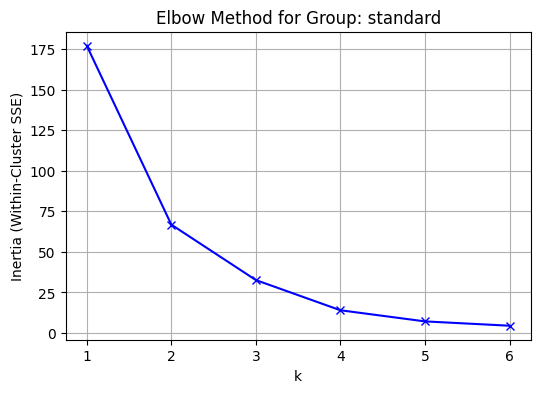

No data for group 'nan'. Skipping.


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


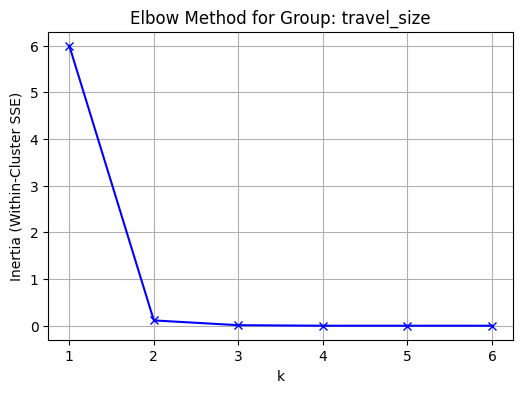

In [ ]:
for group_name in df_cleaned["volume_group"].unique():
    subset = df_cleaned[df_cleaned["volume_group"] == group_name].copy()

    if subset.empty:
        print(f"No data for group '{group_name}'. Skipping.")
        continue

    X_price = subset[["price_numeric"]].values

    if len(subset) <= 1:
        print(f"Only one row in group '{group_name}'. Skipping clustering.")
        continue

    # Scale prices
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_price)

    # Elbow method for this group
    distortions = []
    K_range = range(1, 7)  # Try k=1 to 10
    for k in K_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans_temp.fit(X_scaled)
        distortions.append(kmeans_temp.inertia_)

    # Plot elbow method
    plt.figure(figsize=(6, 4))
    plt.plot(K_range, distortions, 'bx-')
    plt.title(f'Elbow Method for Group: {group_name}')
    plt.xlabel('k')
    plt.ylabel('Inertia (Within-Cluster SSE)')
    plt.xticks(K_range)  # Show integer ticks
    plt.grid(True)
    plt.show()


In [134]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1) Make two volume bins
df_cleaned["volume_group"] = pd.cut(
    df_cleaned["volume"],
    bins=[0, 50, 250],
    labels=["travel_size", "standard"]
)

all_dfs = []

for group_name in ["travel_size", "standard"]:
    # 2) Subset data for that group and scale prices
    subset = df_cleaned[df_cleaned["volume_group"] == group_name].copy()
    X_price = subset[["price_numeric"]].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_price)

    # 3) Pick k=4 if high_volume, else k=6 if low_volume
    if group_name == "standard":
        k = 3
    else:
        k = 2

    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_scaled)

    # Store cluster labels in the subset
    subset["final_cluster"] = kmeans.labels_

    # Collect for concatenation later
    all_dfs.append(subset)

# 4) Combine back into one DataFrame
df_final = pd.concat(all_dfs, ignore_index=True)

# 5) Inspect cluster means, counts, etc.
summary = (
    df_final
    .groupby(["volume_group", "final_cluster"])["price_numeric"]
    .agg(["count", "mean", "min", "max"])
)
print(summary)


                            count        mean     min     max
volume_group final_cluster                                   
travel_size  0                  3   65.600000   57.18   69.81
             1                  3  257.666667  245.00  283.00
             2                  0         NaN     NaN     NaN
standard     0                  5  354.800000  350.00  363.00
             1                137   62.882336   13.23  111.00
             2                 35  164.675714  115.00  247.00


<ipython-input-134-6856b202bec9>:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["volume_group", "final_cluster"])["price_numeric"]


In [135]:

summary["price_range"] = summary["max"] - summary["min"]

# Sort the summary by price_range in descending order
sorted_summary = summary.sort_values(by="price_range", ascending=False)

# Display the sorted summary
print(sorted_summary)


                            count        mean     min     max  price_range
volume_group final_cluster                                                
standard     2                 35  164.675714  115.00  247.00       132.00
             1                137   62.882336   13.23  111.00        97.77
travel_size  1                  3  257.666667  245.00  283.00        38.00
standard     0                  5  354.800000  350.00  363.00        13.00
travel_size  0                  3   65.600000   57.18   69.81        12.63
             2                  0         NaN     NaN     NaN          NaN


In [136]:
# Sort by mean price (ascending) within each volume group
sorted_summary = summary.sort_values(by=["volume_group", "mean"], ascending=[True, True])

# Display the sorted summary
print(sorted_summary)


                            count        mean     min     max  price_range
volume_group final_cluster                                                
travel_size  0                  3   65.600000   57.18   69.81        12.63
             1                  3  257.666667  245.00  283.00        38.00
             2                  0         NaN     NaN     NaN          NaN
standard     1                137   62.882336   13.23  111.00        97.77
             2                 35  164.675714  115.00  247.00       132.00
             0                  5  354.800000  350.00  363.00        13.00


Indian but pack of 4?, bulgarian

In [137]:
# Items in high_volume only
#df_high = df_final[df_final["volume_group"] == "high_volume"]

# Items in cluster 0 within low_volume
df_travel_0 = df_final[
    (df_final["volume_group"] == "travel_size") &
    (df_final["final_cluster"] == 0)
]
df_travel_0

,title,price_numeric,rating_numeric,volume,volume_group,cluster_k3,cluster_k4,cluster_k5,cluster_k6,final_cluster
0,مجموعة كومبو سبلاش للجسم من لاير، 25 مل (عبوة من 4 قطع)، للنساء,57.18,4.0,25.0,travel_size,0.0,3.0,3.0,3.0,0
3,عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين,69.81,4.1,9.0,travel_size,0.0,0.0,0.0,0.0,0
5,عطر روز اوريجينال رول اون بدون كحول 9 مل، للجنسين,69.81,4.1,9.0,travel_size,0.0,0.0,0.0,0.0,0


French high-end


In [138]:
df_travel_1 = df_final[
    (df_final["volume_group"] == "travel_size") &
    (df_final["final_cluster"] == 1)
]
df_travel_1

,title,price_numeric,rating_numeric,volume,volume_group,cluster_k3,cluster_k4,cluster_k5,cluster_k6,final_cluster
1,بانيير دي سين روز أو دي تواليت - صنع في فرنسا - 1.7floz50 مل، للجنسين,283.0,4.1,50.0,travel_size,2.0,2.0,2.0,2.0,1
2,دولتشي اند غابانا ذا ون للنساء 30 مل - او دى بارفان,245.0,4.5,30.0,travel_size,1.0,1.0,1.0,1.0,1
4,دولتشي اند غابانا ذا ون للنساء 30 مل - او دى بارفان,245.0,4.5,30.0,travel_size,1.0,1.0,1.0,1.0,1


brazilian, english

In [139]:
df_standard_0 = df_final[
    (df_final["volume_group"] == "standard") &
    (df_final["final_cluster"] == 0)
]
df_standard_0

,title,price_numeric,rating_numeric,volume,volume_group,cluster_k3,cluster_k4,cluster_k5,cluster_k6,final_cluster
103,اوه بوتكاريو بخاخ للجسم سبا بلام من ناتيفا، 200 مل، للنساء,350.0,5.0,200.0,standard,2.0,3.0,4.0,0.0,0
126,اوه بوتكاريو بخاخ للجسم سبا بلام من ناتيفا، 200 مل، للنساء,350.0,5.0,200.0,standard,2.0,3.0,4.0,0.0,0
142,بخاخ معطر للجسم بجوز الهند من ذا بودي شوب، 100 مل، للجنسين,361.0,4.5,100.0,standard,2.0,3.0,4.0,0.0,0
143,اوه بوتكاريو بخاخ للجسم سبا بلام من ناتيفا، 200 مل، للنساء,350.0,5.0,200.0,standard,2.0,3.0,4.0,0.0,0
170,عطر للنساء م للجسم من او بوتيكاريو Nسبا – كينوا 200 مل,363.0,4.0,200.0,standard,2.0,3.0,4.0,0.0,0


 bath-and-body, jcasanova(french), bundle?, drugstore

In [140]:
df_standard_1 = df_final[
    (df_final["volume_group"] == "standard") &
    (df_final["final_cluster"] == 1)
]
df_standard_1


,title,price_numeric,rating_numeric,volume,volume_group,cluster_k3,cluster_k4,cluster_k5,cluster_k6,final_cluster
6,"جي .كازانوفا بلو بخاخ معطر للجسم برئحة فانيلا فرنسيه , 235 مل، للأنثى",21.00,4.2,235.0,standard,1.0,2.0,1.0,3.0,1
7,سبلاش للجسم للرجال من بيور بيوتي 250 مل ماجيستيك,23.20,4.1,250.0,standard,1.0,2.0,1.0,3.0,1
8,بودي سبلاش كاسانوفا، للجنسين، 235.0 ملليلتر,22.50,5.0,235.0,standard,1.0,2.0,1.0,3.0,1
9,سبراي معطر للجسم من بودي فانتاسيز سيجنتشر - زهرة الكرز اليابانية 236 مل، للأنثى,42.95,4.3,236.0,standard,1.0,2.0,1.0,3.0,1
10,"جي .كازانوفا بلو بخاخ معطر للجسم برئحة تيزمي , 235 مل، للأنثى",21.00,4.7,235.0,standard,1.0,2.0,1.0,3.0,1
11,"جي .كازانوفا بلو بخاخ معطر للجسم برئحة الرمان , 235 مل، للأنثى",24.70,4.0,235.0,standard,1.0,2.0,1.0,3.0,1
12,معطر الجسم سيكرت لاف من بيور بيوتي للنساء، متعدد الألوان، 250 ملليلتر,44.89,4.2,250.0,standard,1.0,2.0,1.0,3.0,1
13,ميست معطر للجسم للنساء من سابيل برائحة التوت، سعة 236 مل,35.00,4.0,236.0,standard,1.0,2.0,1.0,3.0,1
14,بخاخ جسم ثاوزاند ويشز من باث اند بدي وركس، 236 مل، للنساء,49.90,4.6,236.0,standard,1.0,2.0,1.0,1.0,1
15,بخاخ سبلاش الجسم الترا مارين من بيور بيوتي، للرجال، 250.0 ملليلتر,21.00,4.0,250.0,standard,1.0,2.0,1.0,3.0,1


imported: (e.g. victoria's secret)

In [141]:
df_standard_2 = df_final[
    (df_final["volume_group"] == "standard") &
    (df_final["final_cluster"] == 2)
]
df_standard_2

,title,price_numeric,rating_numeric,volume,volume_group,cluster_k3,cluster_k4,cluster_k5,cluster_k6,final_cluster
53,ميست باشن جوز الهند من فيكتوريا سيكريت – 250 مل، للأنثى,115.00,4.5,250.00000,standard,0.0,0.0,0.0,4.0,2
87,عطر للنساء ميست للجسم رومانتيك من فيكتوريا سيكريت - 250 مل,115.00,4.4,250.00000,standard,0.0,0.0,0.0,4.0,2
94,مجموعة ناتشورال بيوتي ميست من فيكتوريا سيكريت (لافندر وفانيليا) للنساء 250 مل,150.00,4.5,250.00000,standard,0.0,1.0,3.0,2.0,2
97,رذاذ الجسم فيكتوريا سيكريت كوكونت ميلك اند روز كالم - عبوة من 1 للجنسين 250 مل,199.00,4.6,250.00000,standard,0.0,1.0,2.0,5.0,2
98,رذاذ معطر للجسم كراش من سول دي جينيرو، 240 مل، للجنسين,163.22,4.7,240.00000,standard,0.0,1.0,3.0,2.0,2
109,مجموعة ناتشورال بيوتي ميست من فيكتوريا سيكريت (لافندر وفانيليا) للنساء 250 مل,150.00,4.5,250.00000,standard,0.0,1.0,3.0,2.0,2
111,رذاذ معطر للجسم كراش من سول دي جينيرو، 240 مل، للجنسين,163.22,4.7,240.00000,standard,0.0,1.0,3.0,2.0,2
112,رذاذ الجسم فيكتوريا سيكريت كوكونت ميلك اند روز كالم - عبوة من 1 للجنسين 250 مل,199.00,4.6,250.00000,standard,0.0,1.0,2.0,5.0,2
122,باث آند بودي وركس - بخاخات عطر جيد - عبوة من زجاجتين بسعة 236 مل (بطيخ الخيار)، للجنسين,229.00,4.6,236.00000,standard,2.0,1.0,2.0,5.0,2
127,كالجون رذاذ الجسم تيك مي اواي هاواي جينجر من كالجون 8 اونصة / 240 مل (للنساء),148.52,4.6,240.00000,standard,0.0,1.0,3.0,2.0,2
